In [3]:
#Google Trends data of keywords such as 'diet' and 'gym' and
#see how they vary over time while learning about trends and seasonality in time series data.

In [138]:
import pandas as pd
df = pd.read_csv('multiTimeline1.csv', skiprows=2)
df.head()


,Month,diet,gym,finance
0,2004-01,100,30,48
1,2004-02,76,26,48
2,2004-03,68,24,47
3,2004-04,70,23,47
4,2004-05,73,23,43


In [105]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 4 columns):
Month      182 non-null object
diet       182 non-null int64
gym        182 non-null int64
finance    182 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.8+ KB


In [6]:

df['gym']

0      30
1      26
2      24
3      23
4      23
5      24
6      23
7      26
8      26
9      23
10     25
11     24
12     33
13     28
14     27
15     25
16     25
17     25
18     24
19     28
20     27
21     26
22     25
23     25
24     33
25     29
26     28
27     26
28     25
29     25
       ..
152    51
153    45
154    45
155    44
156    56
157    51
158    49
159    48
160    48
161    50
162    52
163    51
164    50
165    46
166    47
167    46
168    58
169    52
170    52
171    49
172    49
173    50
174    51
175    51
176    51
177    46
178    47
179    47
180    59
181    53
Name: gym, Length: 182, dtype: int64

In [140]:
#change column name

df.columns = ['month', 'diet', 'gym', 'finance']

df.head()
df.shape

(182, 4)

In [141]:
#change the "month" column into a DateTime data type and make it the index of the DataFrame.

df.month = pd.to_datetime(df.month) 

 # change to index 
df.set_index('month',inplace=True) 

 # results 
    
df.head() 

,diet,gym,finance
month,,,
2004-01-01,100,30,48
2004-02-01,76,26,48
2004-03-01,68,24,47
2004-04-01,70,23,47
2004-05-01,73,23,43


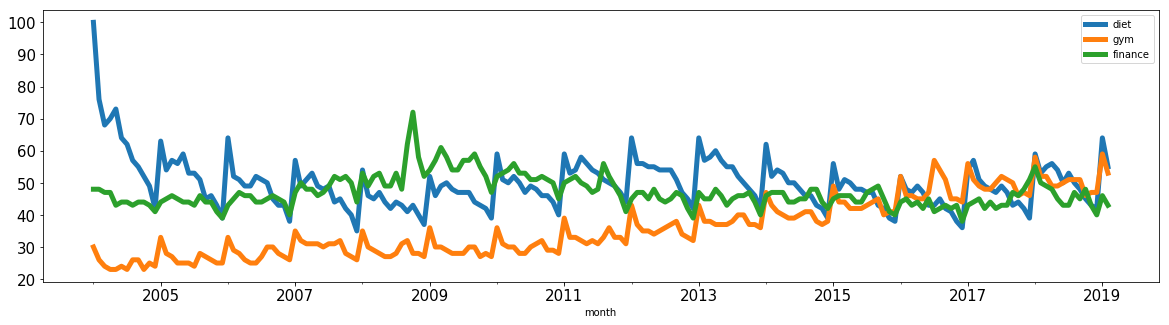

In [145]:
#plot data as 3 line plots on a single figure (one for each column, namely, "diet," "gym," and "finance").
import matplotlib as mb

plt=df.plot(figsize=(20,5), linewidth=5, fontsize=15) 
#plt.label('Month', fontsize=20)
plt


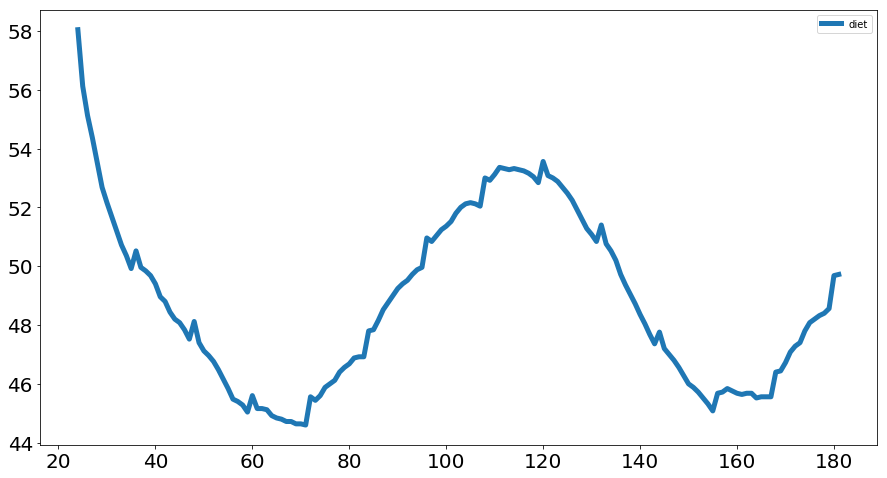

In [109]:
#there is seasonality: each January, there's a big jump.
#Also, there seems to be a trend: it seems to go slightly up, then down, back up and then back down. 
#it looks like there are trends and seasonal components to these time series.
#so lets identify trends in your time series!
#One popular way is by taking a rolling average, which means that, for each time point,
#you take the average of the points on either side of it. 
#Note that the number of points is specified by a window size, which you need to choose.
#it tends to smooth out noise and seasonality

#yearly seasonality

diet = df[['diet']]
d=diet.rolling(25).mean().plot(figsize=(15,8), linewidth=5, fontsize=20)
#plt.xlabel('Year', fontsize=20);

#now we have removed most of the seasonality compared to the previous plot.


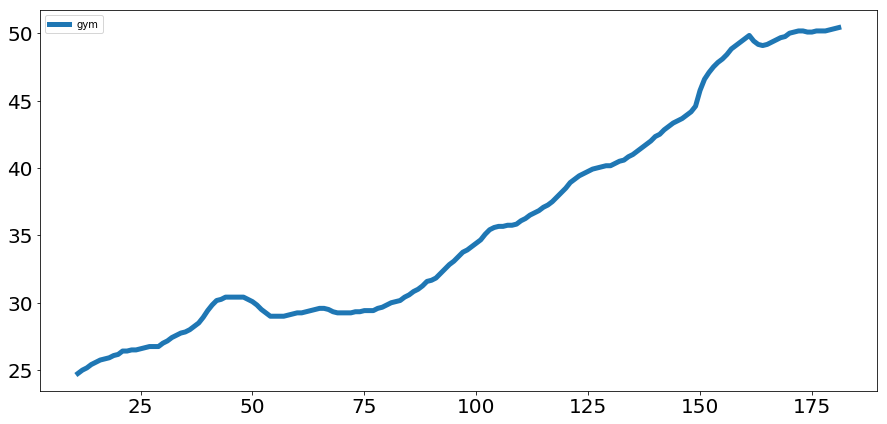

In [110]:
#plot the rolling average of 'gym' 
gym = df[['gym']]
gym.rolling(12).mean().plot(figsize=(15,7), linewidth=5, fontsize=20)
#plt.xlabel('Year', fontsize=20);

#we see an upward trend of gym


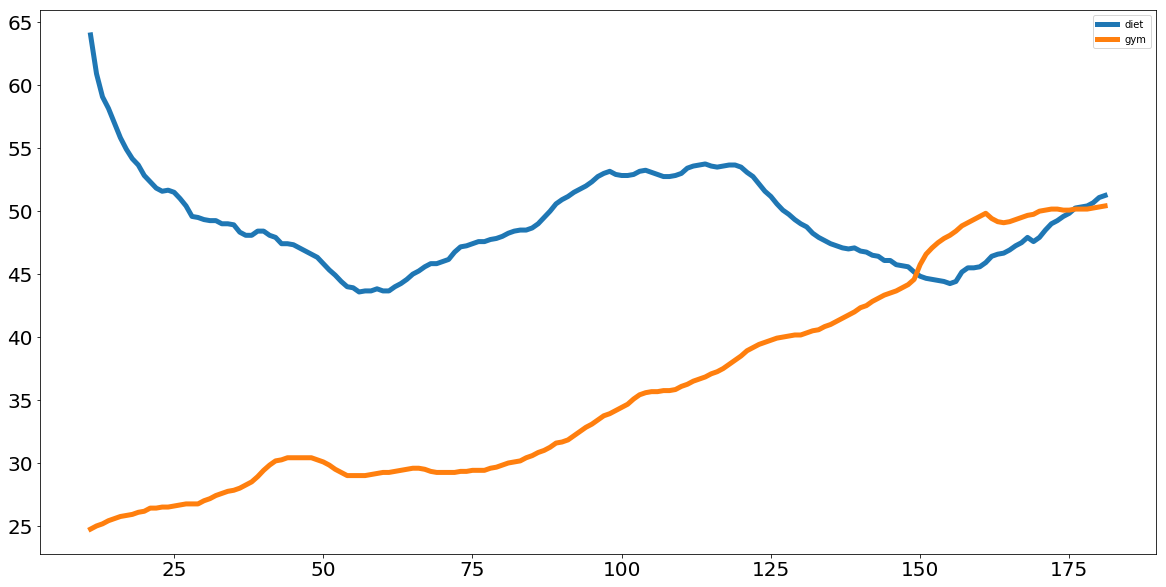

In [114]:
#to  compare these two searches
#plotting the trends of 'gym' and 'diet' on a single figure:

df_rm = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()])
df_rm
df_rm.plot(figsize=(20,10), linewidth=5, fontsize=20)
#plt.xlabel('Year', fontsize=20);
#to concatenate them as columns, you also added the axisargument, which you set to 1.


#we observe that diet potentially has some form of seasonality, whereas gym is actually increasing!

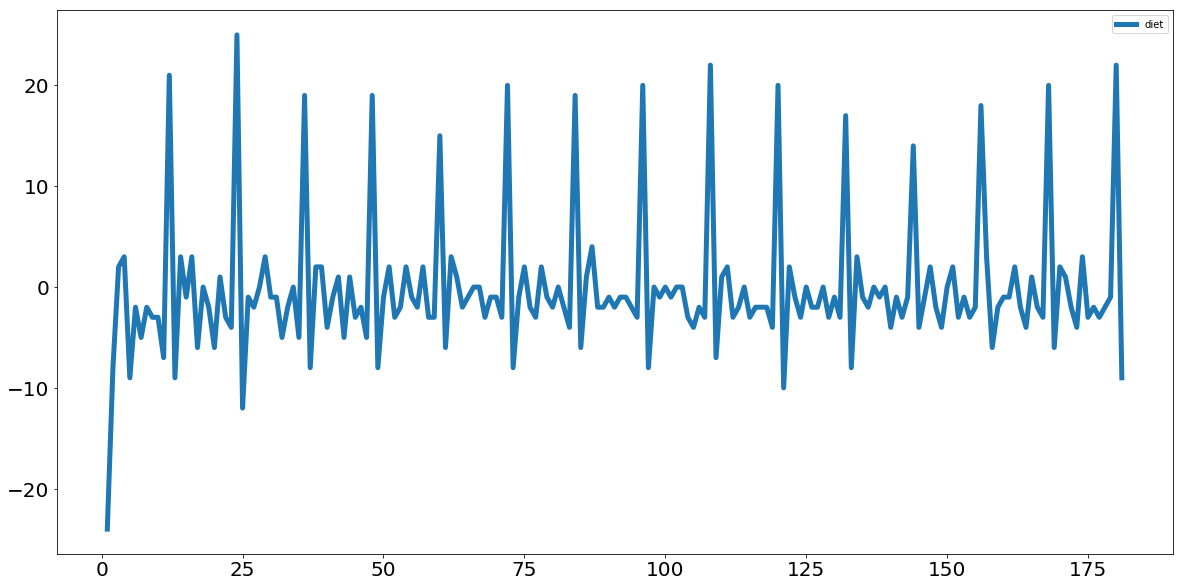

In [122]:
#now think about seasonality, which is the repetitive nature of your time series
#remove the trend from a time series, so that you can more easily investigate seasonality.

#Use "differencing", where you look at the difference between successive data points (called "first-order differencing", 
dff=diet.diff()
dff.plot(figsize=(20,10), linewidth=5, fontsize=20)
#plt.xlabel('Year', fontsize=20);


#we observe Each January, there is a huge spike of 20 or more percent on the highest search item you've seen!

In [51]:
#2nd order differencing, which means that you would be looking at the difference
#between one data point and the two that precede it, if the trend is not yet entirely removed. 
#Differencing is super helpful in turning your time series into a stationary time series. 

#This time series is one whose statistical properties (such as mean and variance) don't change over time. 
#These time series are useful because many time series forecasting methods are based on the assumption 
#that the time series is approximately stationary.

#Periodicity and Autocorrelation

#A time series is periodic if it repeats itself at equally spaced intervals, say, every 12 months.
#if the time series has a peak somewhere, then it will have a peak 12 months after that and,
#if it has a trough somewhere, it will also have a trough 12 months after that
#time series is correlated with itself shifted by 12 months

#means if you took the time series and moved it 12 months backwards or forwards, it would map onto itself in some way.


In [115]:
#taking  a column
diet1=df['diet']
diet1

type(diet1)


pandas.core.series.Series

In [116]:
diet2=df[['diet']]
diet2

type(diet2)


pandas.core.frame.DataFrame

In [123]:
df.corr()

,diet,gym,finance
diet,1.000000,-0.030678,-0.014465
gym,-0.030678,1.000000,-0.262798
finance,-0.014465,-0.262798,1.000000


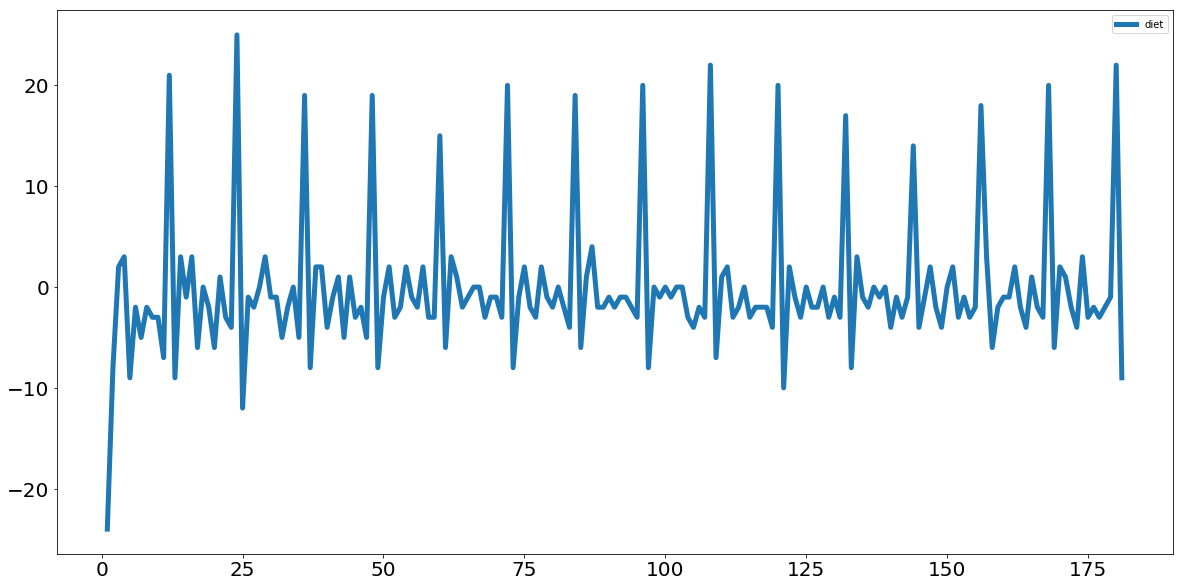

In [146]:
#first order difference and correlation
diet.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)

#plt.xlabel('Year', fontsize=20);
#removed much of the trend and see the peaks in January every year. 
#Each January, there is a huge spike of 20 or more percent on the highest search item you've seen!

In [147]:
df.diff().corr()
#Now, we can see that with the seasonal component, "diet" and "gym" are highly correlated

,diet,gym,finance
diet,1.000000,0.805164,0.432003
gym,0.805164,1.000000,0.366211
finance,0.432003,0.366211,1.000000


In [148]:
data = pd.read_csv('AirPassengers.csv')
data


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [149]:
data.head(5)

#one way we have done
data.Month=pd.to_datetime(data.Month)
data.set_index('month',inplace=True)

#df.month = pd.to_datetime(df.month) 

 # change to index 
#df.set_index('month',inplace=True) 




KeyError: 'month'

In [150]:
#second method
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [87]:
#1. Specific the index as a string constant:
ts = data['#Passengers'] 
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [88]:
#ts['1949-01-01']

#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
#use this
ts['1949-5-1']
#or use this
#print(ts[datetime(1949,5,1)])

121

In [95]:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

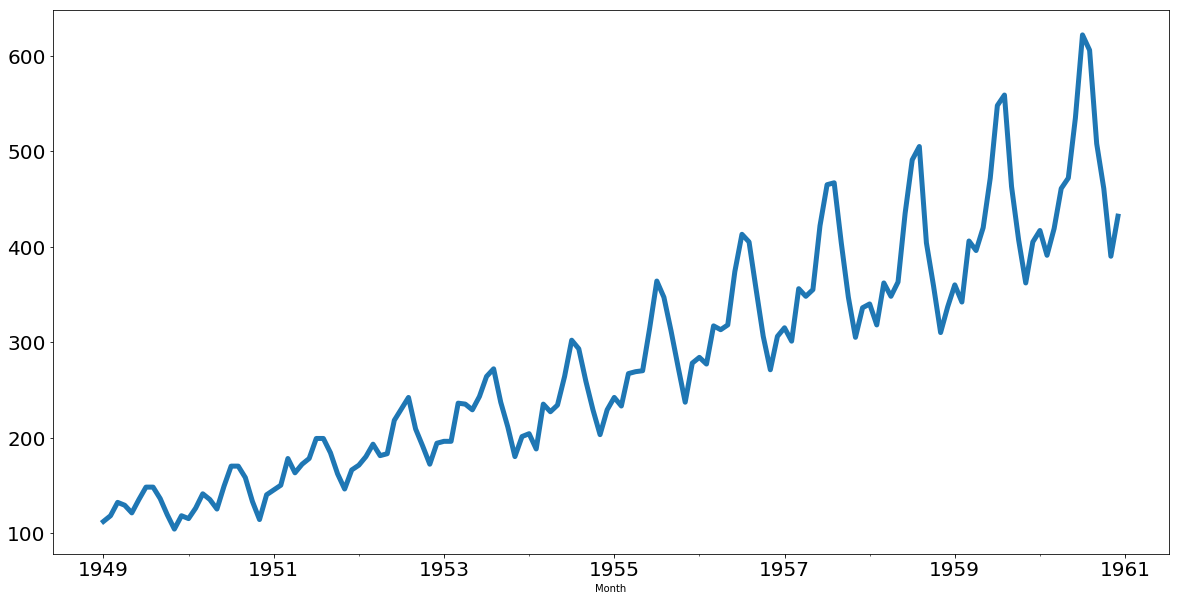

In [96]:
plt.plot(ts)
plt=ts.plot(figsize=(20,10), linewidth=5, fontsize=20) 

In [93]:
#complete year 1949
ts1=ts['1949']

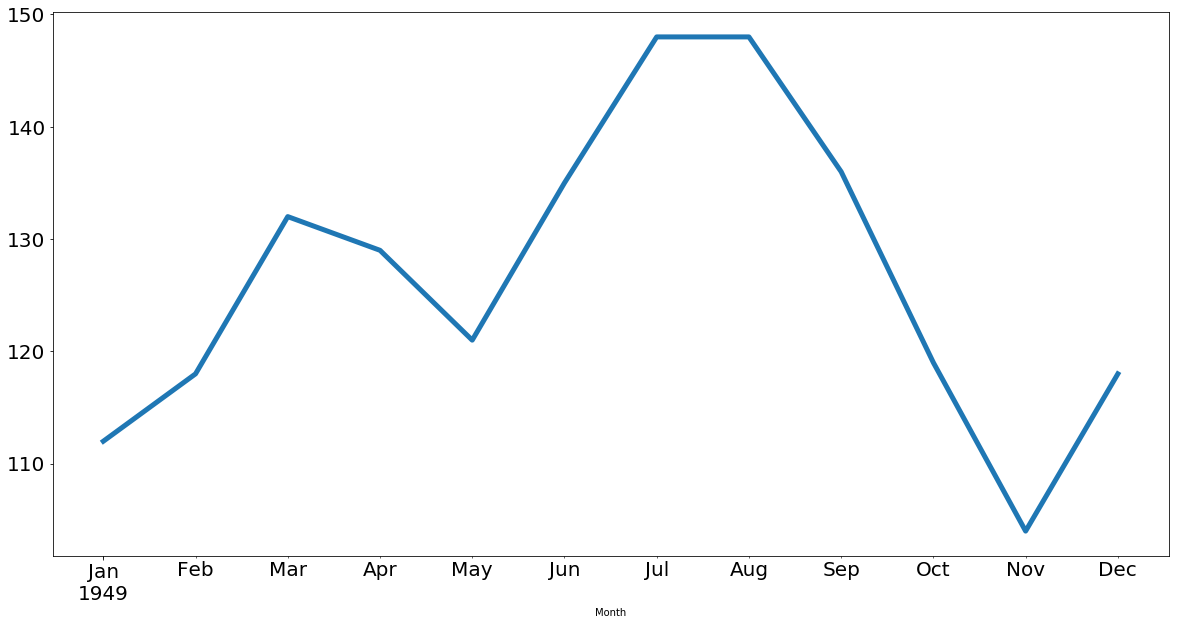

In [94]:
plt.plot(ts)
plt=ts1.plot(figsize=(20,10), linewidth=5, fontsize=20) 


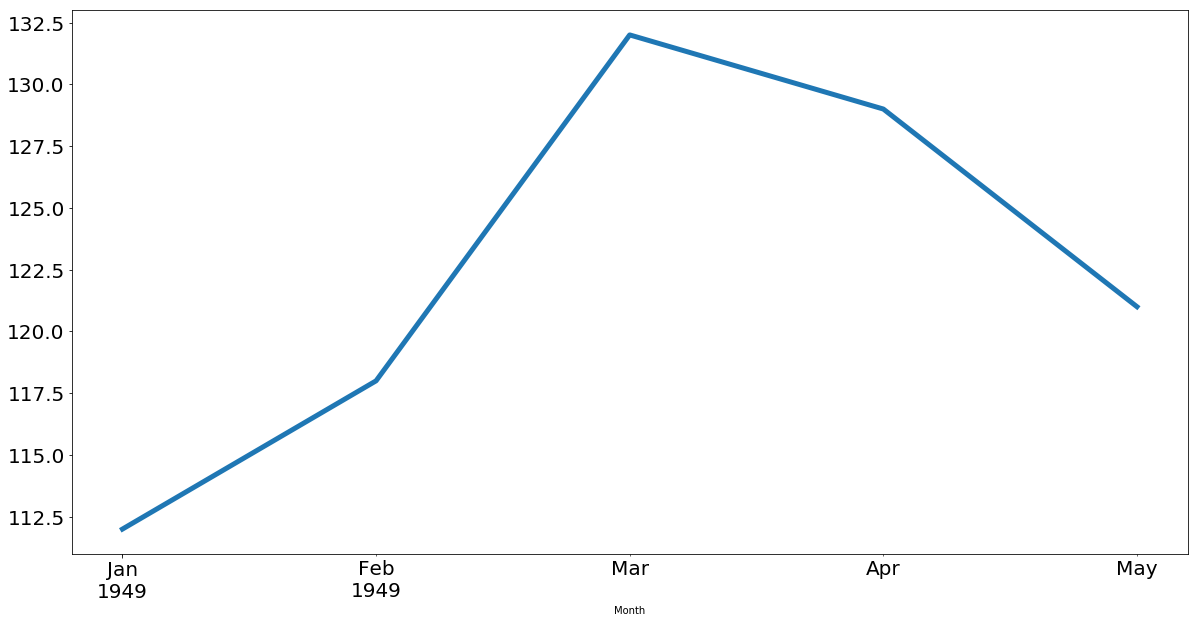

In [101]:
#1. Specify the entire range:
tsrange=ts['1949-01-01':'1949-05-01']
tsrange

plt.plot(tsrange)
plt=tsrange.plot(figsize=(20,10), linewidth=5, fontsize=20) 


In [27]:
#2. Use ':' if one of the indices is at ends:
ts[:'1949-05-01']
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
1951-01-01    145
1951-02-01    150
1951-03-01    178
1951-04-01    163
1951-05-01    172
1951-06-01    178
             ... 
1958-07-01    491
1958-08-01    505
1958-09-01    404
1958-10-01    359
1958-11-01    310
1958-12-01    337
1959-01-01    360
1959-02-01    342
1959-03-01    406
1959-04-01    396
1959-05-01    420
1959-06-01    472
1959-07-01    548
1959-08-01    559
1959-09-01    463
1959-10-01    407
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960

In [35]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(ts):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(ts, window=12)
    rolstd = pd.rolling_std(ts, window=12)

    #Plot rolling statistics:
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
   # plt.title('Rolling Mean & Standard Deviation')
    #plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.tSeries(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print( dfoutput)

In [36]:
test_stationarity(ts)

Results of Dickey-Fuller Test:


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


NameError: name 'timeseries' is not defined